# Credit Card Fraud Detection using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("creditcard.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class
0    284315
1       492
Name: count, dtype: int64


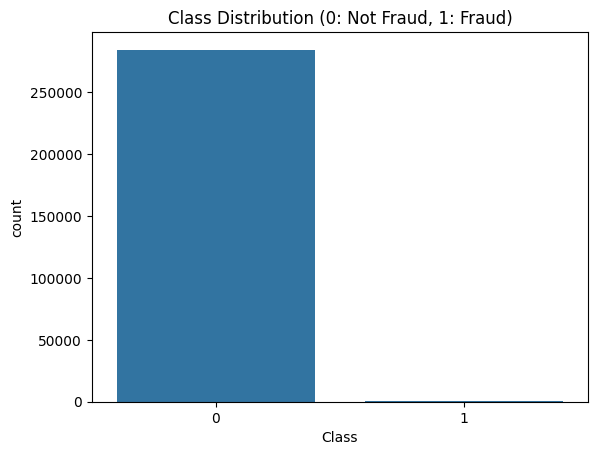

In [3]:
print(df['Class'].value_counts())
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0: Not Fraud, 1: Fraud)")
plt.show()

In [4]:
X = df.drop(['Class'], axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Reduce dataset size temporarily for faster testing
df_small = df.sample(frac=0.2, random_state=42)  # Use 20% of the full dataset

X = df_small.drop(['Class'], axis=1)
y = df_small['Class']

# Re-scale after reducing size
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

print("After SMOTE:", np.bincount(y_resampled))

After SMOTE: [56863 56863]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=20)
model = LogisticRegression()
%time model.fit(X, y)


CPU times: total: 0 ns
Wall time: 10.5 ms


LogisticRegression()

In [8]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [9]:
# Train both models
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)  # <--- This line defines y_pred_rf


In [10]:
def evaluate_model(y_true, y_pred, title):
    print(f"\nModel: {title}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Model: Logistic Regression
Accuracy: 0.9617075529763475
Confusion Matrix:
 [[11183   320]
 [  551 10692]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     11503
           1       0.97      0.95      0.96     11243

    accuracy                           0.96     22746
   macro avg       0.96      0.96      0.96     22746
weighted avg       0.96      0.96      0.96     22746


Model: Random Forest
Accuracy: 0.9997362173568979
Confusion Matrix:
 [[11497     6]
 [    0 11243]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11503
           1       1.00      1.00      1.00     11243

    accuracy                           1.00     22746
   macro avg       1.00      1.00      1.00     22746
weighted avg       1.00      1.00      1.00     22746

